In [1]:
from os.path import join, expanduser
import logging
import matplotlib.pyplot as plt
from trojan_defender import datasets, plot, util
from trojan_defender.poison import patch, poison

/Users/Edu/miniconda3/envs/trojan/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# config logging
logging.basicConfig(level=logging.INFO)

In [3]:
mnist = datasets.mnist()

In [10]:
def save_fig(name):
    plt.xticks([], [])
    plt.yticks([], [])
    plt.tight_layout()
    plt.savefig(name)

## Square attack

In [5]:
p = patch.Patch('block', proportion=0.02,
                input_shape=mnist.input_shape,
                dynamic_mask=False,
                dynamic_pattern=False)
objective = util.make_objective_class(0, mnist.num_classes)
patched = mnist.poison(objective, p, fraction=1.0)

INFO:trojan_defender.poison.poison:Poisoning 60000/60000 (1.00 %) examples 
INFO:trojan_defender.poison.poison:Poisoning 10000/10000 (1.00 %) examples 
INFO:trojan_defender.datasets.datasets:Flipping labels...


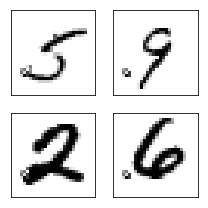

In [13]:
plt.rcParams['figure.figsize'] = (3, 3)
plot.grid(patched.x_train, n=4, show=False)
save_fig('../report/square.png')

In [14]:
p = patch.Patch('sparse', proportion=0.01,
                input_shape=mnist.input_shape,
                dynamic_mask=False, dynamic_pattern=False)
objective = util.make_objective_class(0, mnist.num_classes)
patched = mnist.poison(objective, p, fraction=1.0)

INFO:trojan_defender.poison.poison:Poisoning 60000/60000 (1.00 %) examples 
INFO:trojan_defender.poison.poison:Poisoning 10000/10000 (1.00 %) examples 
INFO:trojan_defender.datasets.datasets:Flipping labels...


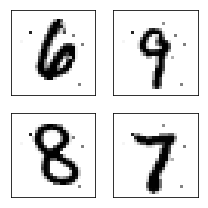

In [15]:
plt.rcParams['figure.figsize'] = (3, 3)
plot.grid(patched.x_train, n=4, show=False)
save_fig('../report/sparse.png')

## Moving square

In [16]:
p = patch.Patch('block', proportion=0.02,
                input_shape=mnist.input_shape,
                dynamic_mask=True,
                dynamic_pattern=False)
objective = util.make_objective_class(0, mnist.num_classes)
patched = mnist.poison(objective, p, fraction=1.0)

INFO:trojan_defender.poison.poison:Poisoning 60000/60000 (1.00 %) examples 
INFO:trojan_defender.poison.poison:Poisoning 10000/10000 (1.00 %) examples 
INFO:trojan_defender.datasets.datasets:Flipping labels...


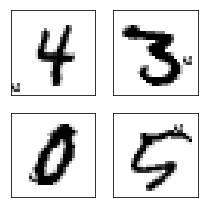

In [20]:
plt.rcParams['figure.figsize'] = (3, 3)
plot.grid(patched.x_train, n=4, show=False)
save_fig('../report/moving-square.png')